<a href="https://colab.research.google.com/github/Jacky1102/stat1013/blob/main/1155212894_Project_partA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CUHK-STAT1013: Practical Assignment Part 1: Sharing Your Idea and Data**

- Student ID: 1155212894
- Student Name: Wong Chun Yin

## **Stock of Apple and Xiaomi - Background**

### **Dataset Description**
This dataset is combined by two datasets - Stock of Apple and Xiaomi. Each row represents a trading day and each column represents different variables.Also, the data in the dataset spans from January 2024 to March 2025.

### **Aim of Testing**
The primary objective of this analysis is to examine the hypothesis: "Do more people buy Xiaomi stocks than Apple stocks?" We intend to use data to determine the accuracy of this claim.


### **Related Features of the Dataset**
- **Date**: Trading day, formatted as MM/DD/YY
- **Type**: Company name(Apple/Xiaomi)
- **Close/Last**: The closing price in USD
- **Volume**: The number of shares traded
- **Open**: The opening price in USD
- **High**: The highest price during the day in USD
- **Low**: The lowest price during the day in USD


### **Github Repository**
You can access the dataset on GitHub: [Stock Dataset CSV](https://github.com/Jacky1102/stat1013-/blob/main/data.csv)

### **Sample Size**
There are a total of **248** trading days in the dataset.


## **Hypothesis Questions**

- Tell us what your idea is and why you have chosen to pursue this idea.
  - We are interested in "*Do more people buy Xiaomi stocks than Apple stocks?*"

- What two groups you are comparing:
  - **G1**: Open price of **Apple**;
  - **G2**: Open price of **Xiaomi**


- What you will be measuring (i.e., what your response variable will be)
  - `Open`

- Is your response variable quantitative rather than categorical?
  - Data in `Open` column are integers, which can be considered a *quantitative variable*.

- Make a prediction about what kind of difference you expect to see between your samples and WHY.
  - We expect that `Open` of **G1** will be greater than **G2**. It is because more people will choose to use Apple products, which means they spend more money on Apple.

- Talk about how you will gather your data
  - From Nasdaq:
    - https://www.nasdaq.com/market-activity/stocks/xiacy/historical

    - https://www.nasdaq.com/market-activity/stocks/aapl/historical

  - I combined these two dataset by using excel and upload it to Github
    - https://github.com/Jacky1102/stat1013-/blob/main/data.csv

- If you had unlimited resources (time, money, staff, etc.) how would you collect your data?
  - I will collect data from a longer period of time to expand the dataset. It can reflect the long-term trend of stock prices, rather than just being limited to a certain time period. Also, I will use money to build a system to analyze the data to build a model for prediction.

## **Prepare your dataset**

In [4]:
## load dataset from github

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Jacky1102/stat1013-/refs/heads/main/data.csv')
df.head(5)

,Date,Type,Close/Last,Volume,Open,High,Low
0,3/7/2025,Apple,239.07,46273570,235.105,241.3700,234.7600
1,3/6/2025,Apple,235.33,45170420,234.435,237.8600,233.1581
2,3/5/2025,Apple,235.74,47227640,235.420,236.5500,229.2300
3,3/4/2025,Apple,235.93,53798060,237.705,240.0700,234.6800
4,3/3/2025,Apple,238.03,47183990,241.790,244.0272,236.1120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        248 non-null    object 
 1   Type        248 non-null    object 
 2   Close/Last  248 non-null    float64
 3   Volume      248 non-null    int64  
 4   Open        248 non-null    float64
 5   High        248 non-null    float64
 6   Low         248 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 13.7+ KB


- Tell us what groups you want to compare in the dataset
  - **G1** (Open| Type = Apple) vs. **G2** (Open | Type = Xiaomi)

- Print first 5 records of each group, respectively.  

In [6]:
## First 5 records of G1 (Apple)
(df[df['Type'] == 'Apple'][['Type', 'Open']]).head(5)

,Type,Open
0,Apple,235.105
1,Apple,234.435
2,Apple,235.420
3,Apple,237.705
4,Apple,241.790


In [7]:
## First 5 records of G2 (Xiaomi)
(df[df['Type'] == 'Xiaomi'][['Type', 'Open']]).head(5)

,Type,Open
124,Xiaomi,34.35
125,Xiaomi,35.36
126,Xiaomi,34.93
127,Xiaomi,31.65
128,Xiaomi,32.55


Calculate the mean of open price of Apple and Xiaomi

In [8]:
## Mean of Apple's open price
print(df[df['Type'] == 'Apple']['Open'].mean())

234.0189516129032


In [9]:
## Mean of Xiaomi's open price
print(df[df['Type'] == 'Xiaomi']['Open'].mean())

20.557137096774195


Calculate the standard derivation of open price of Apple and Xiaomi

In [10]:
## Standard derivation of Apple's open price
print(df[df['Type'] == 'Apple']['Open'].std())

9.735973990431317


In [11]:
## Standard derivation of Xiaomi's open price
print(df[df['Type'] == 'Xiaomi']['Open'].std())

6.220123426133617


Calculate the quantile of open price of Apple and Xiaomi

In [37]:
##Quantile of Apple's open price
import numpy

print(numpy.quantile(df[df['Type'] == 'Apple']['Open'], [0,0.25,0.5,0.75,1]))

[215.75   226.835  232.605  241.8525 258.19  ]


In [38]:
##Quantile of Xiaomi's open price
import numpy

print(numpy.quantile(df[df['Type'] == 'Xiaomi']['Open'], [0,0.25,0.5,0.75,1]))

[11.7    16.075  18.86   23.3775 36.45  ]


Checking whether open price of Apple and Xiaomi follow normal distrubution.

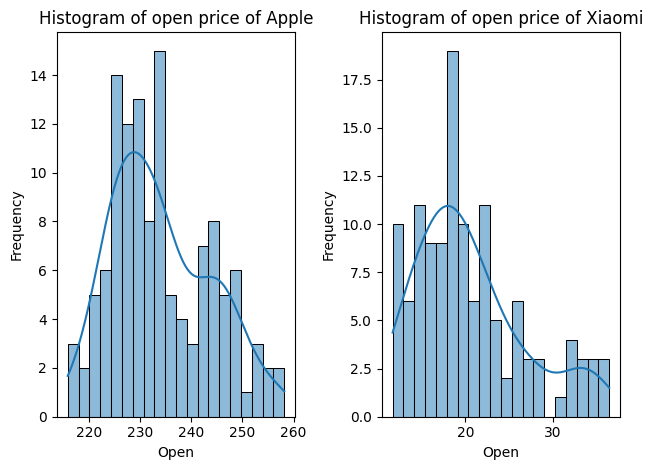

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
sns.histplot(df[df['Type'] == 'Apple']['Open'], bins=20, kde=True)
plt.title('Histogram of open price of Apple')
plt.xlabel('Open')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['Type'] == 'Xiaomi']['Open'], bins=20, kde=True)
plt.title('Histogram of open price of Xiaomi')
plt.xlabel('Open')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

From the above plots, we can observe that they are not following normal distribution.

## **Graphs and Descriptive Statistics**

1. Creation and interpretation of at least one suitable graphs (e.g., boxplot, violinplot, barplot) for each group **(4 points)**.


This is a line plot that visually shows the opening price trend between Apple and Xiaomi.

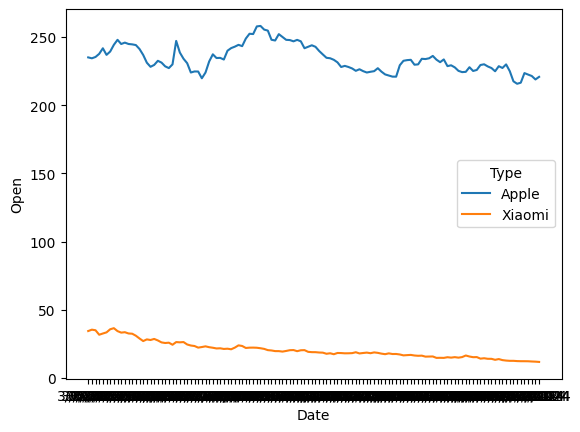

In [32]:
sns.lineplot(data=df, x="Date", y="Open", hue='Type')
plt.show()

These are violin plot that visually shows the range and central tendency of opening price of Apple and Xiaomi

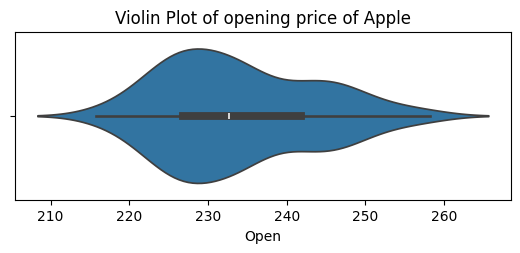

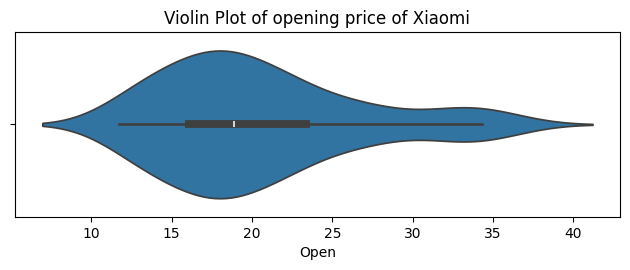

In [45]:
plt.subplot(2, 1, 1)
sns.violinplot(x=df[df['Type'] == 'Apple']['Open'])
plt.title('Violin Plot of opening price of Apple')
plt.show()

plt.subplot(2, 1, 2)
sns.violinplot(x=df[df['Type'] == 'Xiaomi']['Open'])
plt.title('Violin Plot of opening price of Xiaomi')

plt.tight_layout()
plt.show()

2. Provision of appropriate summary statistics (measures of center and spread) for each group, with a descriptive analysis of the data **(3 points)**.

In [24]:
df.groupby('Type')['Open'].agg(['mean', 'std'])

,mean,std
Type,,
Apple,234.018952,9.735974
Xiaomi,20.557137,6.220123


3. Discussion of similarities and differences between the groups **(3 points)**.

- **Similarity**:
  - The opening prices of the two companies are mostly concentrated in a certain range when we observe the violin plots.

- **Difference**:
  - From the line plot, we can see that Apple's opening price has been fluctuating for many days. On the contrary, Xiaomi's opening price dropped significantly.